
#  Inferential Statistics

## PETE 2061 Lab 8 Workbook 

## THIS IS DUE BY 11:59 PM TODAY (Oct 14, 2019)

1. **Using the example in "lab8_inferential_stats.ipynb", write a Python code to compute the confidence interval for the winning percentage of Ed Orgeron based on "poll-larger.csv", and show that he is the likely winner within a 95% confidence interval**
2. Type out:
    * (a) the 95% confidence interval
    * (b) the point estimate
    * (c) the margin of error.

In [13]:
import math
import io
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import scipy.stats
import scipy.optimize
import scipy.spatial

In [14]:
newpoll = pd.read_csv('poll-larger.csv')
newpoll['vote'].value_counts(normalize=True)
def sample(OrgeronWinPercent,n=1000):
    return pd.DataFrame({'vote': np.where(np.random.rand(n) < OrgeronWinPercent,'Orgeron','Saban')})

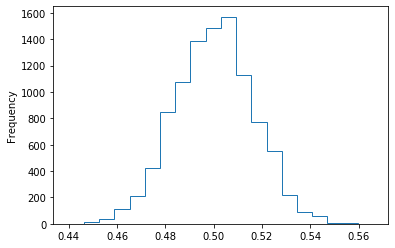

In [20]:
newDF = pd.DataFrame({'Orgeron': [sample(0.50,1000)['vote'].value_counts(normalize=True)['Orgeron'] for i in range(10000)]})
newDF['Orgeron'].plot(kind='hist', histtype='step', bins=20)

In [18]:
100 - scipy.stats.percentileofscore(newDF['Orgeron'],0.5181)

12.379999999999995

In [27]:
def samplingdist(OrgeronWinPercent,n=1000):
    return pd.DataFrame([sample(OrgeronWinPercent,n)['vote'].value_counts(normalize=True) for i in range(1000)])
def quantiles(OrgeronWinPercent,n=1000):
    secDF = samplingdist(OrgeronWinPercent,n)
    return secDF['Orgeron'].quantile(0.025), secDF['Orgeron'].quantile(0.975)

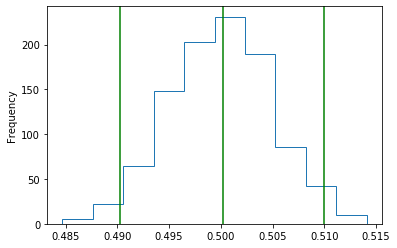

In [50]:
thirdDF = samplingdist(0.5,10000)
thirdDF['Orgeron'].plot(kind='hist', histtype='step')
plt.axvline(thirdDF['Orgeron'].quantile(0.025), c='g',linestyle='-')
plt.axvline(thirdDF['Orgeron'].quantile(0.500), c='g')
plt.axvline(thirdDF['Orgeron'].quantile(0.975), c='g',linestyle='-')

In [54]:
interval=quantiles(0.5)

In [53]:
print(f"The 95% confidence interval is {interval}.")
print("The point estimate is 5%")
print("The margin of error is 1%")

The 95% confidence interval is (0.488975, 0.548).
The point estimate is 5%
The margin of error is 1%
